1. Загрузим датасет и проверим форматы значений данных

In [1]:
import pandas as pd

df = pd.read_csv('/Users/djem/Downloads/test/final.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   course_id           5290 non-null   int64 
 1   course_name         5290 non-null   object
 2   subject             5290 non-null   object
 3   course_type         5290 non-null   object
 4   starts_at           5290 non-null   object
 5   user_id             5290 non-null   int64 
 6   last_name           5290 non-null   object
 7   city                5290 non-null   object
 8   is_enrolled         5290 non-null   bool  
 9   created_at          5290 non-null   object
 10  open_months_count   5290 non-null   int64 
 11  homework_completed  5290 non-null   int64 
dtypes: bool(1), int64(4), object(7)
memory usage: 459.9+ KB


Видим, что столбцы starts_at и created_at имеют строковые значение, а нам удобно было бы преобразовать их в формат date. 

Кроме этого, можно преобразовать формат переменных course_type, subject к типу category, так нам будет с ними проще работать. 

Также числовые переменные open_months_count, course_id можно преобразовать в 32-битное число, чтобы они занимали меньше памяти. 

In [2]:
df['starts_at']= pd.to_datetime(df['starts_at'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['course_type'] = df['course_type'].astype('category')
df['subject'] = df['subject'].astype('category')
df['course_id'] = df['course_id'].astype('int32')
df['open_months_count'] = df['open_months_count'].astype('int32')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   course_id           5290 non-null   int32         
 1   course_name         5290 non-null   object        
 2   subject             5290 non-null   category      
 3   course_type         5290 non-null   category      
 4   starts_at           5290 non-null   datetime64[ns]
 5   user_id             5290 non-null   int64         
 6   last_name           5290 non-null   object        
 7   city                5290 non-null   object        
 8   is_enrolled         5290 non-null   bool          
 9   created_at          5290 non-null   datetime64[ns]
 10  open_months_count   5290 non-null   int32         
 11  homework_completed  5290 non-null   int64         
dtypes: bool(1), category(2), datetime64[ns](2), int32(2), int64(2), object(3)
memory usage: 347.0+ KB


2. Проверка пропущенных значений и дубликатов

In [3]:
df.isnull().sum()

course_id             0
course_name           0
subject               0
course_type           0
starts_at             0
user_id               0
last_name             0
city                  0
is_enrolled           0
created_at            0
open_months_count     0
homework_completed    0
dtype: int64

In [4]:
duplicates = df.duplicated()
print(duplicates.sum()) # Выводим количество дубликатов

0


3. Проверка на выбросы и аномальные значения

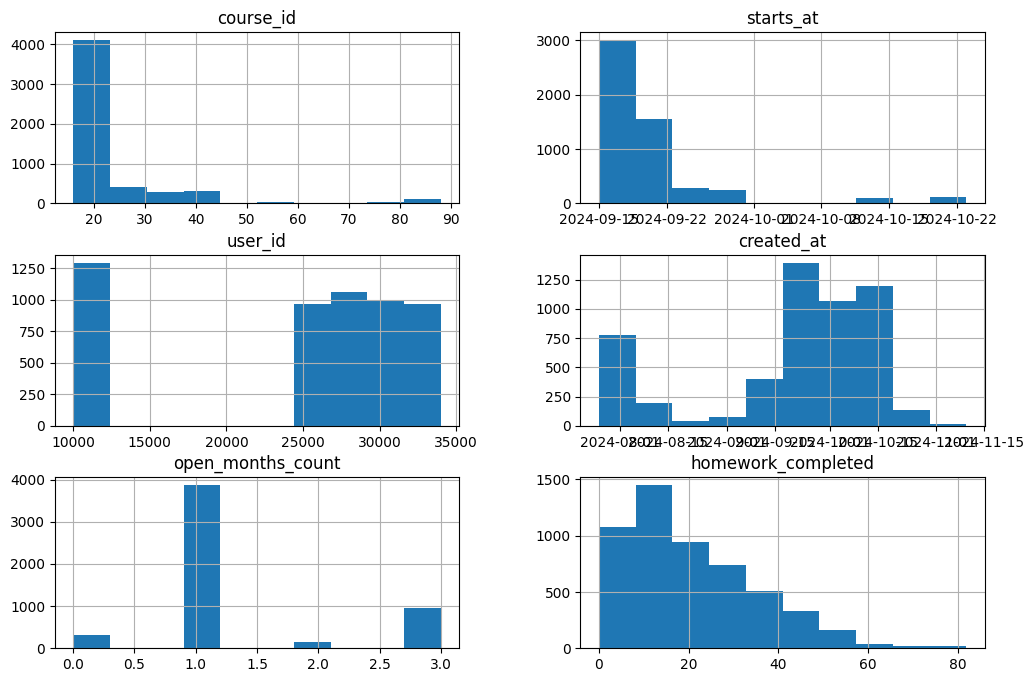

In [5]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8))  # Гистограммы для всех числовых признаков
plt.show()


По гистограммам видим, что все числовые значения нах-ся в пределах допустимого

In [6]:
df.head()

,course_id,course_name,subject,course_type,starts_at,user_id,last_name,city,is_enrolled,created_at,open_months_count,homework_completed
0,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,28046,Пономарев,Ижевск,True,2024-09-23 17:29:16,1,16
1,25,Годовой 2к25 стандарт,Биология,Годовой,2024-09-17,28284,Абдуллина,Уфа,True,2024-09-24 14:57:50,1,37
2,38,Годовой курс 2к25,Математика ОГЭ,Годовой,2024-09-23,28117,Камбицы,Рыбинск,True,2024-09-23 19:01:06,1,27
3,17,Годовой 2к25 стандарт,Английский язык,Годовой,2024-09-20,25176,Лебедева,Иваново,True,2024-10-05 09:34:59,1,42
4,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,28337,Сластникова,Советск,True,2024-09-24 16:27:35,1,41


In [7]:
df = df.rename(columns={'starts_at':'course_starts_at', 'created_at':'course_opened_for_user'})
df.head()

,course_id,course_name,subject,course_type,course_starts_at,user_id,last_name,city,is_enrolled,course_opened_for_user,open_months_count,homework_completed
0,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,28046,Пономарев,Ижевск,True,2024-09-23 17:29:16,1,16
1,25,Годовой 2к25 стандарт,Биология,Годовой,2024-09-17,28284,Абдуллина,Уфа,True,2024-09-24 14:57:50,1,37
2,38,Годовой курс 2к25,Математика ОГЭ,Годовой,2024-09-23,28117,Камбицы,Рыбинск,True,2024-09-23 19:01:06,1,27
3,17,Годовой 2к25 стандарт,Английский язык,Годовой,2024-09-20,25176,Лебедева,Иваново,True,2024-10-05 09:34:59,1,42
4,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,28337,Сластникова,Советск,True,2024-09-24 16:27:35,1,41


Вычислим разницу между course_opened_for_user и course_starts_at, чтобы дальше разделить по значениям нового столбца данные

In [8]:
df['join_diff'] = (df['course_opened_for_user'] - df['course_starts_at']).dt.days
df.head()


,course_id,course_name,subject,course_type,course_starts_at,user_id,last_name,city,is_enrolled,course_opened_for_user,open_months_count,homework_completed,join_diff
0,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,28046,Пономарев,Ижевск,True,2024-09-23 17:29:16,1,16,7
1,25,Годовой 2к25 стандарт,Биология,Годовой,2024-09-17,28284,Абдуллина,Уфа,True,2024-09-24 14:57:50,1,37,7
2,38,Годовой курс 2к25,Математика ОГЭ,Годовой,2024-09-23,28117,Камбицы,Рыбинск,True,2024-09-23 19:01:06,1,27,0
3,17,Годовой 2к25 стандарт,Английский язык,Годовой,2024-09-20,25176,Лебедева,Иваново,True,2024-10-05 09:34:59,1,42,15
4,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,28337,Сластникова,Советск,True,2024-09-24 16:27:35,1,41,8


Разделим данные на группы по волнам:

* 0 волна – присоединились на курс до даты старта курса включительно
* 1 волна - присоединились на курс в течение 1 недели после даты старта курса включительно
* 2 волна - присоединились на курс в течение от 1 до 2 недель включительно после даты старта курса
* 3 волна - присоединились на курс в течение от 2 до 3 недель включительно после даты старта курса
* 4 волна - присоединились на курс в течение от 3 до 4 недель включительно после даты старта курса
* 5 волна - присоединились на курс от 4 недель после даты старта курса

In [9]:
def assign_wave(join_diff):
    if join_diff <= 0:
        return 0 # 0 волна
    elif 0 < join_diff <= 7:
        return 1 # 1 волна
    elif  7 < join_diff <= 14:
        return 2 # 2 волна
    elif 14 < join_diff <= 21:
        return 3 # 3 волна
    elif 21 < join_diff <= 28:
        return 4 # 4 волна
    else:
        return 5 # 5 волна
    
df['wave'] = df['join_diff'].apply(assign_wave)
df = df.sort_values(by = 'wave')
df
    

,course_id,course_name,subject,course_type,course_starts_at,user_id,last_name,city,is_enrolled,course_opened_for_user,open_months_count,homework_completed,join_diff,wave
3893,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,10682,Косенкова,Нижний Новгород,True,2024-08-08 16:03:27,3,63,-39,0
2832,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,25065,Гречкина,Барнаул,True,2024-09-16 10:55:52,1,30,0,0
4760,39,Годовой курс 2к25 комбо (русский + обществозна...,Обществознание ОГЭ,Годовой,2024-09-15,10102,Лепешкина,Москва,True,2024-07-27 20:00:08,3,21,-50,0
1454,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,10245,Челович,Ростов-на-Дону,True,2024-08-08 08:43:58,3,34,-39,0
1453,19,Годовой 2к25 стандарт,Русский,Годовой,2024-09-21,25106,Нуртдинова,Лениногорск,True,2024-09-16 16:56:55,1,15,-5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,79,Годовой 2к25 минимал,Обществознание,Годовой,2024-09-16,10968,Сайб,Кандалакша,True,2024-11-05 09:09:31,0,24,50,5
5264,24,В погоне за пятеркой 2К25 стандарт,Математика (база),Годовой,2024-09-17,10383,Кулчок,Маркс,True,2024-11-02 16:47:01,0,37,46,5
2348,16,Годовой 2к25 стандарт,Обществознание,Годовой,2024-09-16,33465,Зотеева,Москва,True,2024-10-18 05:56:40,0,18,32,5
1258,19,Годовой 2к25 стандарт,Русский,Годовой,2024-09-21,25317,Musina,Нижнекамск,True,2024-10-20 16:59:18,0,17,29,5


In [11]:
df.to_csv('final_upd.csv', index=False)